## Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.

#### Linear regression and logistic regression are both statistical models used in machine learning and data analysis, but they are used for different types of problems.

#### Linear regression is used when the response variable is continuous, meaning it can take on any value within a range. The goal of linear regression is to find the best linear relationship between the predictor variables and the response variable. For example, a linear regression model could be used to predict a person's salary based on their years of experience.

#### Logistic regression, on the other hand, is used when the response variable is categorical, meaning it can take on one of a limited number of values. The goal of logistic regression is to find the relationship between the predictor variables and the probability of a certain outcome. For example, logistic regression could be used to predict whether a customer will buy a product based on their age, gender, and income level.
#### An example of a scenario where logistic regression would be more appropriate than linear regression is in predicting whether a person will be approved or denied for a loan. The response variable is categorical, either approved or denied, and cannot take on a continuous range of values. Additionally, the relationship between the predictor variables, such as credit score, income, and debt-to-income ratio, and the probability of approval is nonlinear. Logistic regression can model this nonlinear relationship and provide a probability of approval or denial based on the input variables.

#### In summary, linear regression is used when the response variable is continuous, while logistic regression is used when the response variable is categorical. Logistic regression is more appropriate in scenarios where the relationship between the predictor variables and the probability of a certain outcome is nonlinear.

## Q2. What is the cost function used in logistic regression, and how is it optimized?

#### In logistic regression, the cost function is used to measure the performance of the model by calculating the difference between the predicted probabilities and the actual class labels. The cost function is also known as the log-loss function or cross-entropy loss function.

#### The cost function is defined as:

#### J(w) = -1/m * sum(y * log(h(x)) + (1-y) * log(1 - h(x)))

#### #### .where:

#### .J(w) is the cost function
#### .w is the vector of parameters that need to be learned to make predictions
#### .m is the number of training examples
#### .y is the true class label (0 or 1)
#### .h(x) is the predicted probability of the positive class given the input x
#### The goal of the optimization algorithm is to find the values of the parameter vector w that minimize the cost function. This is typically done using an iterative algorithm such as gradient descent.
#### Gradient descent works by iteratively updating the parameter vector w in the opposite direction of the gradient of the cost function with respect to w. The update rule is:

#### w := w - alpha * dJ/dw

#### where:

#### alpha is the learning rate, which controls the size of the update at each iteration
#### dJ/dw is the gradient of the cost function with respect to the parameter vector w
#### The gradient of the cost function can be calculated using the chain rule of calculus, which involves taking the derivative of the cost function with respect to each parameter w_i. The updated parameter vector is then used to make predictions on the training data and the process is repeated until the cost function converges to a minimum.

#### In summary, the cost function in logistic regression is the log-loss function or cross-entropy loss function, which is optimized using an iterative algorithm such as gradient descent. The goal is to find the values of the parameter vector w that minimize the cost function and provide accurate predictions on the training data.

## Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

#### Regularization is a technique used in logistic regression to prevent overfitting by adding a penalty term to the cost function. Overfitting occurs when the model is too complex and fits the training data too well, but performs poorly on new, unseen data. Regularization helps to prevent overfitting by discouraging the model from learning too much detail from the training data.

#### There are two common types of regularization used in logistic regression: L1 regularization and L2 regularization.

#### L1 regularization, also known as Lasso regularization, adds a penalty term to the cost function that is proportional to the absolute values of the parameter vector w. The L1 penalty encourages the model to learn sparse solutions, meaning that many of the parameters will be set to zero, resulting in a simpler model.

#### L2 regularization, also known as Ridge regularization, adds a penalty term to the cost function that is proportional to the square of the values of the parameter vector w. The L2 penalty encourages the model to learn small parameter values, which can also result in a simpler model.
#### The amount of regularization is controlled by a hyperparameter called lambda. A higher value of lambda results in more regularization, while a lower value of lambda results in less regularization. The value of lambda is typically chosen using cross-validation on a separate validation set to find the value that provides the best balance between underfitting and overfitting.

#### Regularization helps prevent overfitting by adding a penalty term to the cost function that discourages the model from learning too much detail from the training data. This encourages the model to learn simpler solutions that generalize better to new, unseen data.#### 

## Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

#### The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model, such as logistic regression. It is created by plotting the true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis, at various threshold settings.

#### The TPR is the proportion of positive cases that are correctly classified as positive by the model, while the FPR is the proportion of negative cases that are incorrectly classified as positive by the model. By varying the threshold at which we classify a case as positive or negative, we can generate a range of TPR and FPR values and plot them on the ROC curve. A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top left corner of the ROC curve. A random classifier, on the other hand, would have a diagonal line from the bottom left corner to the top right corner, indicating that the TPR and FPR are equal at all thresholds.

#### In general, a better classifier will have a ROC curve that is closer to the top left corner of the plot. We can quantify the overall performance of the model by calculating the area under the curve (AUC) of the ROC curve. A perfect classifier will have an AUC of 1, while a random classifier will have an AUC of 0.5.

#### The ROC curve and AUC are useful tools for evaluating the performance of a logistic regression model because they provide a way to compare different models and to visualize the trade-off between sensitivity (TPR) and specificity (1 - FPR) at different thresholds. The ROC curve is also robust to imbalanced classes, unlike other evaluation metrics such as accuracy, which can be misleading in the presence of class imbalance.

#### Below is example in python showing ROC curve and ROC_AUC Score :#### 

ROC AUC Score : 0.9253




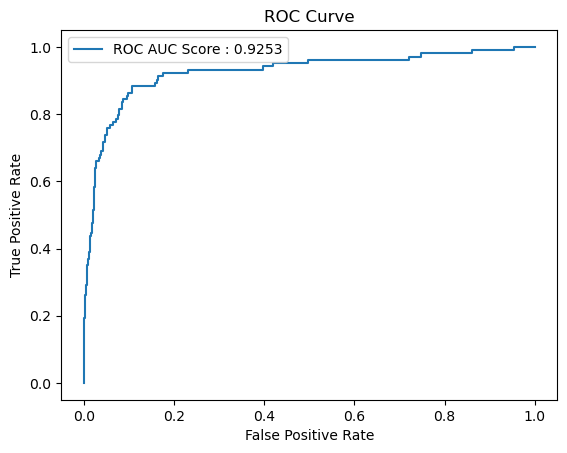

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predict probabilities for test set
probs = clf.predict_proba(X)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, probs)

# Calculate AUC
auc = roc_auc_score(y, probs)
print('ROC AUC Score : %.4f' % auc)

print('\n===================================================================\n')

# Plot ROC curve
plt.plot(fpr, tpr,label=f"ROC AUC Score : {auc:.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

#### Feature selection is the process of selecting a subset of relevant features (or variables) from the original set of features to use in a model. In logistic regression, feature selection techniques can help to improve the model's performance by reducing the number of irrelevant or redundant features, thereby reducing overfitting and increasing interpretability.

#### Here are some common techniques for feature selection in logistic regression:
#### 1.Univariate feature selection: This method evaluates each feature individually to determine its relationship with the target variable. It uses statistical tests such as chi-squared test, ANOVA, or correlation coefficient to rank the features based on their p-values or correlation strength. The top k features with the highest scores are selected for the model.

#### 2.Recursive feature elimination (RFE): This method uses an iterative process to remove features from the model one by one based on their importance scores. The importance score can be derived from the coefficients of the logistic regression model or from external methods such as random forests. RFE continues to remove features until the optimal number of features is reached.

#### 3.Lasso regularization: This method adds a penalty term to the logistic regression objective function that shrinks the coefficients of some features to zero, effectively removing them from the model. The strength of the penalty is controlled by a hyperparameter called the regularization strength. This method can select a sparse set of features that are most relevant to the target variable.

#### 4.Principal component analysis (PCA): This method transforms the original features into a new set of linearly uncorrelated variables called principal components. These components are sorted in descending order of explained variance, and the top k components are selected for the model. This method can help to reduce multicollinearity and simplify the model.

#### 5.Forward selection/backward elimination: These methods are stepwise selection algorithms that iteratively add or remove features from the model based on their contribution to the model's performance. Forward selection starts with an empty model and adds the best feature at each step until a stopping criterion is reached. Backward elimination starts with the full model and removes the least important feature at each step until a stopping criterion is reached.

#### These feature selection techniques help to improve the performance of logistic regression models by reducing the number of irrelevant or redundant features, which can lead to overfitting, improve interpretability, and simplify the model. By selecting a subset of the most relevant features, these techniques can also improve the model's predictive accuracy and reduce the risk of spurious correlations

## Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

#### Imbalanced datasets occur when one class of the target variable is much more prevalent than the other. This can cause logistic regression models to be biased towards the majority class, leading to poor performance for the minority class. Here are some strategies for handling imbalanced datasets in logistic regression:

#### 1.Resampling: This involves either oversampling the minority class (i.e., creating new synthetic samples from the minority class) or undersampling the majority class (i.e., randomly removing samples from the majority class). The goal is to balance the class distribution in the dataset. However, oversampling can lead to overfitting, and undersampling can result in loss of information.

#### 2.Cost-sensitive learning: This involves assigning different misclassification costs to each class, such that misclassifying the minority class is penalized more heavily than misclassifying the majority class. This can be achieved by adjusting the threshold for class prediction, or by modifying the logistic regression objective function to include the cost matrix.

#### 3.Class weighting: This involves assigning a higher weight to the minority class samples during model training. This can be achieved by setting the class_weight parameter in scikit-learn's LogisticRegression class to 'balanced', which automatically adjusts the weights based on the class distribution.

#### 4.Ensemble methods: This involves combining multiple logistic regression models trained on different subsets of the dataset or with different hyperparameters. This can include bagging, boosting, or stacking methods, which can help to reduce the bias towards the majority class and improve the overall performance.

#### 5.Anomaly detection: This involves treating the minority class as an anomaly or outlier detection problem, and using techniques such as one-class SVM or isolation forest to identify and classify the minority class samples.

#### These strategies can help to address the problem of class imbalance in logistic regression models, and improve the performance for the minority class. However, the choice of strategy may depend on the specific characteristics of the dataset and the goals of the analysis. It is important to evaluate the performance of the model using appropriate metrics such as precision, recall, F1-score, or ROC AUC, and to perform cross-validation to assess the generalization performance of the model.#### 

## Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

#### Logistic regression is a powerful and widely used method for modeling binary or categorical outcomes. However, there are several issues and challenges that can arise when implementing logistic regression. Here are some common issues and possible solutions:

#### 1.Multicollinearity: This occurs when two or more independent variables are highly correlated with each other, which can cause unstable or biased coefficient estimates. To address multicollinearity, one option is to remove one of the correlated variables from the model. Alternatively, techniques such as principal component analysis (PCA) or ridge regression can be used to reduce the dimensionality of the data and account for the collinearity.

#### 2.Overfitting: This occurs when the model is too complex and captures noise or random fluctuations in the data, leading to poor generalization performance. To address overfitting, techniques such as regularization, cross-validation, or early stopping can be used to reduce the complexity of the model and improve its generalization performance.

#### 3.Imbalanced data: This occurs when the two classes in the binary outcome variable are not equally represented in the dataset. To address imbalanced data, techniques such as resampling, cost-sensitive learning, or class weighting can be used to balance the class distribution and improve the performance for the minority class.

#### 4.Outliers: This occurs when some observations in the dataset have extreme values or deviate significantly from the rest of the data. To address outliers, techniques such as robust regression, trimming, or Winsorization can be used to reduce the influence of the outliers on the model estimation.

#### 5.Missing data: This occurs when some observations have missing values for some of the variables in the dataset. To address missing data, techniques such as imputation, complete case analysis, or multiple imputation can be used to estimate the missing values and retain as much information as possible from the incomplete data.

#### Overall, logistic regression can be a powerful tool for modeling binary outcomes, but it requires careful attention to the potential issues and challenges that can arise during implementation. By addressing these issues using appropriate techniques and strategies, we can improve the performance and interpretability of logistic regression models.
#### Reducing Multicolinearity using PCA Python code

In [3]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Generate a binary classification dataset with 1000 samples
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Use PCA to reduce the dimensionality of the data and account for collinearity
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,-1]

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred_prob)
print(f"Accuracy: {acc:.4f}")
print(f'ROC AUC Score : {roc:.4f}')

Accuracy: 0.8200
ROC AUC Score : 0.9110


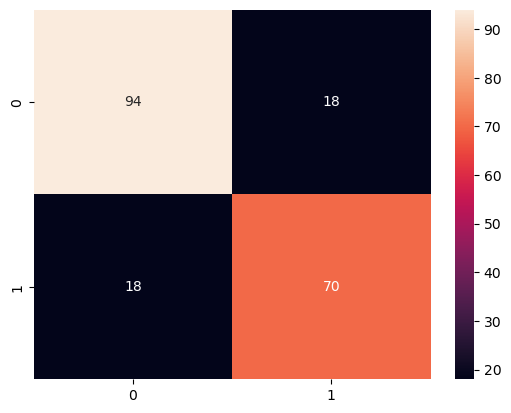

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.show()

In [5]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       112
           1       0.80      0.80      0.80        88

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

